In [4]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [35]:
target_values = [1, 0, 1, 1, 1, 0.6, 0.95]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row[:-1])
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = "D:\ASE2020-ExperimentData/RandomSearch/2021_01_06_Random_results_200000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_Random_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
            
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    37     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1     0     0     0     0     0    23
     0     1     0   328     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     8     0     5     0     0     0   478
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    17     0     0     0     0     0     0     8     0     0
     0   125   228   192     0    26     0 11461] 12938 12938


In [23]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.027451942212587472
15 0.1171875


In [24]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,9.502389,1.0,1.005055,1.0,0.984480,0.998435
1,1.0,7.245077,1.0,1.000000,1.0,0.986666,0.998704
2,1.0,-1.000000,1.0,1.000000,1.0,0.949738,0.990511
3,1.0,17.294360,1.0,1.000000,1.0,0.867755,0.993368
4,1.0,5.480933,1.0,1.000000,1.0,0.980966,0.997146
...,...,...,...,...,...,...,...
12933,1.0,-1.000000,1.0,1.000000,1.0,0.878006,0.983462
12934,1.0,12.042240,1.0,1.000000,1.0,0.906905,0.993046
12935,1.0,50.726448,1.0,1.000000,1.0,0.955951,0.996401
12936,1.0,31.382246,1.0,1.000000,1.0,1.000000,1.000000


D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


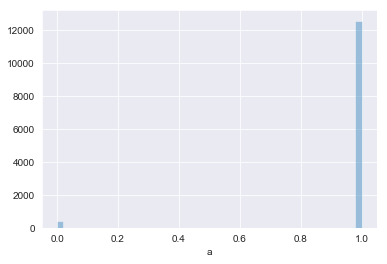

In [25]:
sns.distplot(data_result['a'],kde = False)

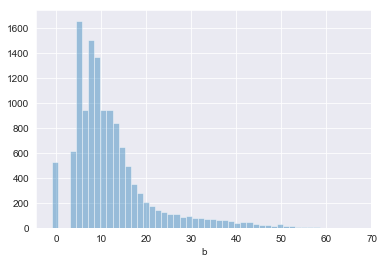

In [26]:
sns.distplot(data_result['b'],kde = False)

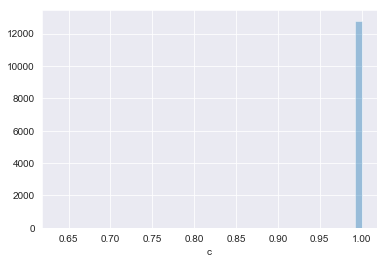

In [27]:
sns.distplot(data_result['c'],kde = False)

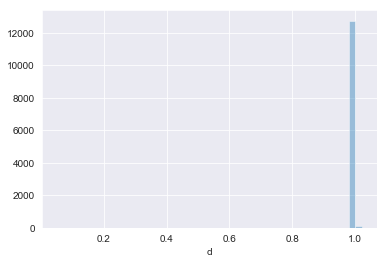

In [28]:
sns.distplot(data_result['d'],kde = False)

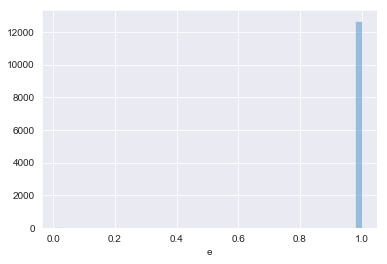

In [29]:
sns.distplot(data_result['e'],kde = False)

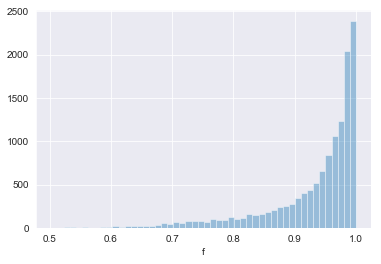

In [30]:
sns.distplot(data_result['f'],kde = False)

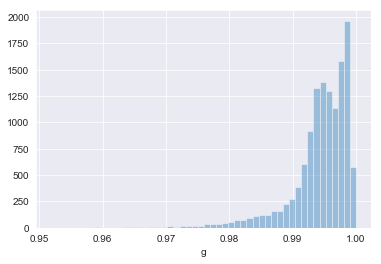

In [31]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d         e         f         g
a  1.000000  0.087354 -0.015184 -0.013856  0.032750  0.185148  0.011937
b  0.087354  1.000000  0.057341  0.004053  0.094708  0.151317  0.202053
c -0.015184  0.057341  1.000000 -0.006769  0.117280  0.046940  0.375522
d -0.013856  0.004053 -0.006769  1.000000 -0.009532 -0.016142 -0.054222
e  0.032750  0.094708  0.117280 -0.009532  1.000000  0.206129  0.227233
f  0.185148  0.151317  0.046940 -0.016142  0.206129  1.000000  0.456805
g  0.011937  0.202053  0.375522 -0.054222  0.227233  0.456805  1.000000


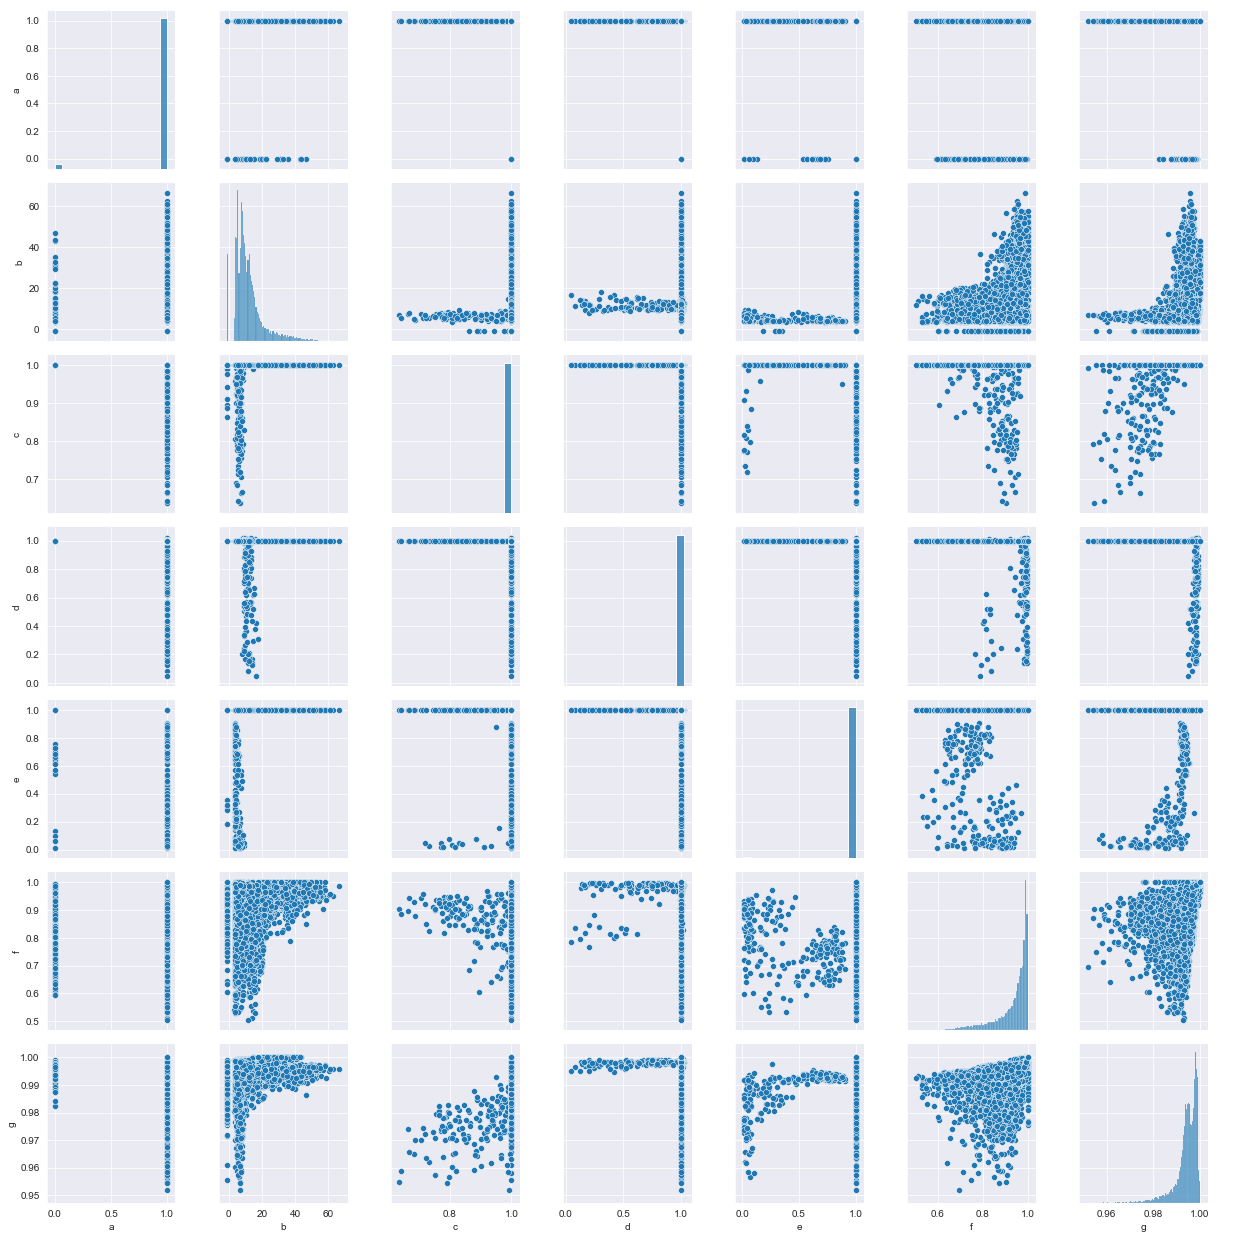

In [32]:
print(data_result.corr())
sns.pairplot(data_result)

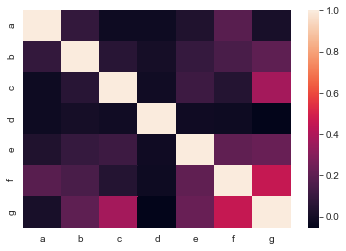

In [33]:
sns.heatmap(data_result.corr())

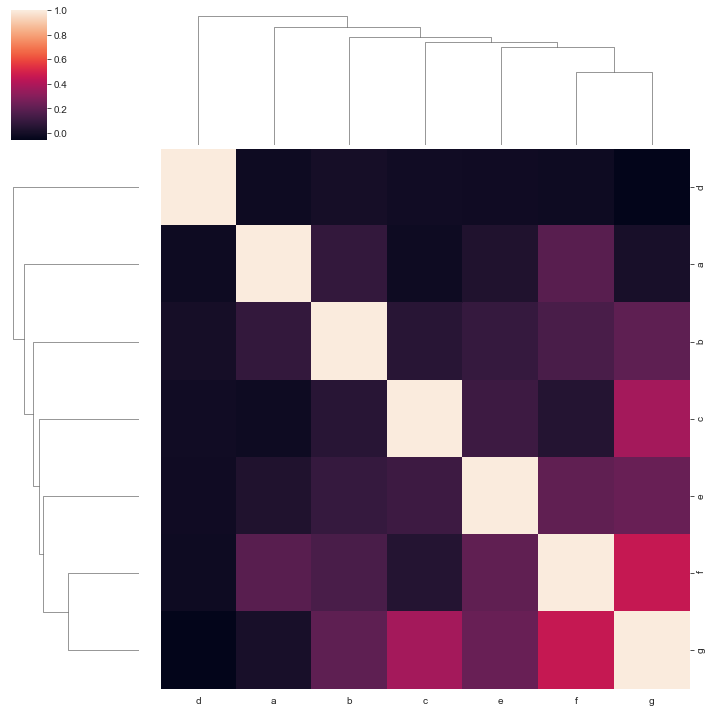

In [34]:
sns.clustermap(data_result.corr())

D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_base.py:239: FutureWar

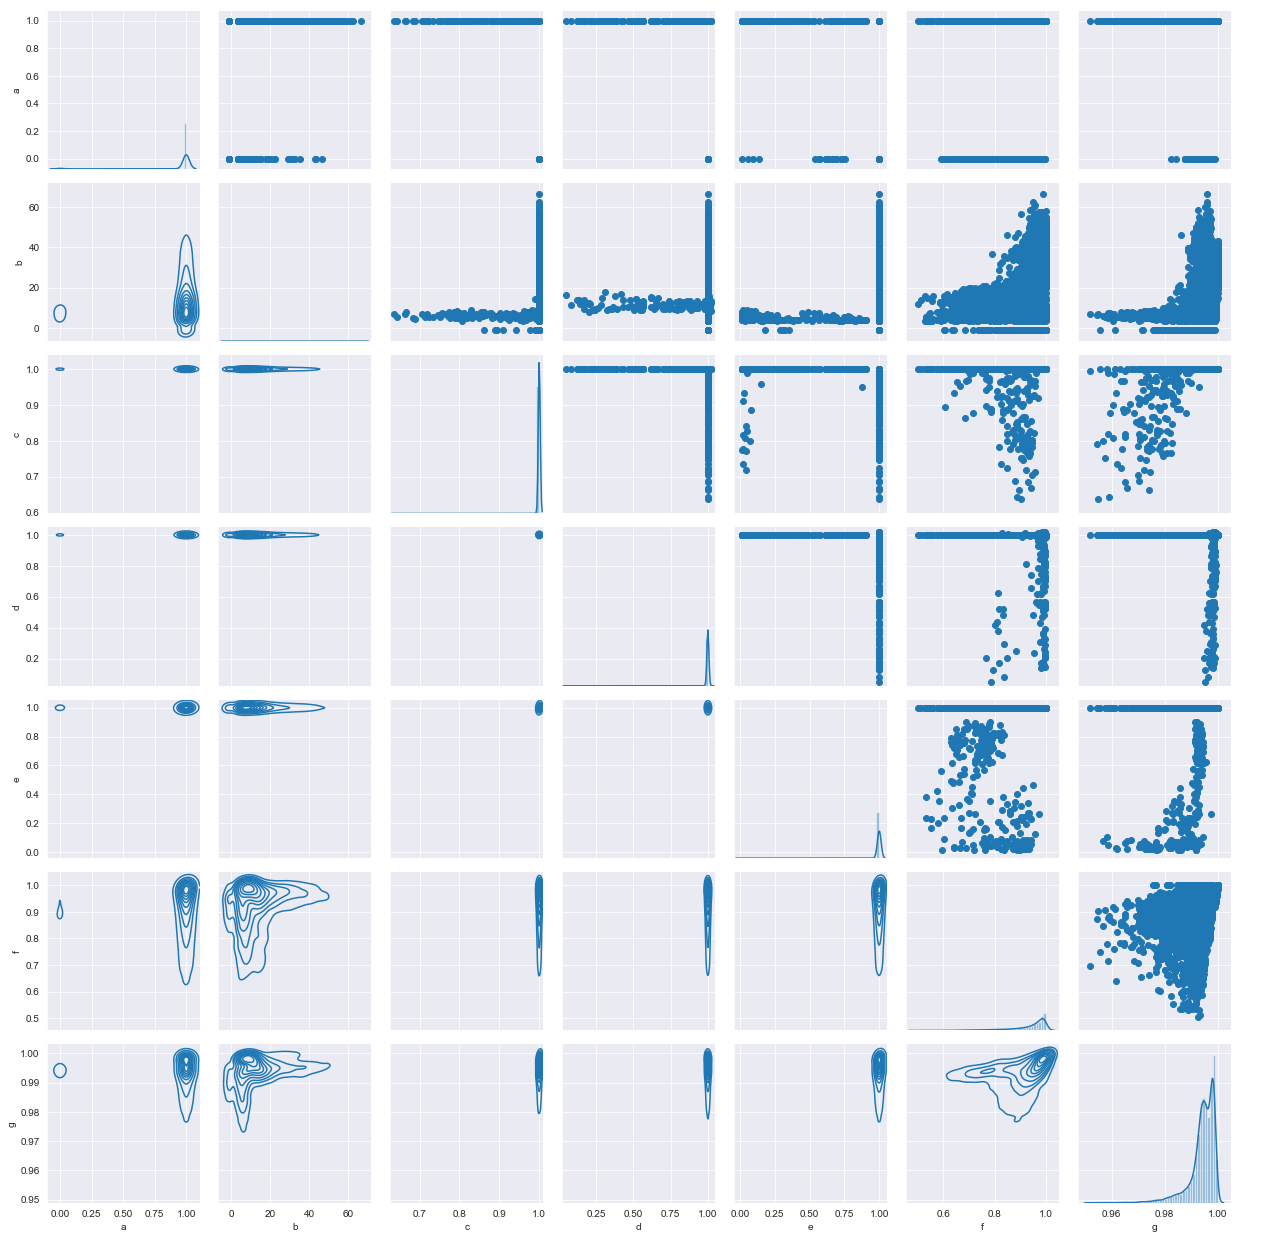

In [21]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)